In [1]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import local_eb_kernel as rk
from scipy.integrate import quad
import timeit

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib import rcParams,rc
params = {'backend': 'pdf',
          'savefig.dpi': 200,
          'axes.labelsize': 15,
          'text.fontsize': 15,
          'axes.linewidth' : 2,
          'lines.linewidth' : 2,
          'font.size': 15,
          'xtick.labelsize': 15,
          'ytick.major.pad': 6,
          'xtick.major.pad': 6,
          'ytick.labelsize': 15,
          'text.usetex': True,
          'font.family':'sans-serif',
          'font.sans-serif':'FreeSans'}
rc('text.latex', preamble='\usepackage{sfmath}')
rcParams.update(params)

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
figpath="../../figures/supplementary/"
!mkdir $figpath

mkdir: ../../figures/supplementary/: File exists


In [60]:
def return_disc_rad(lmax):
    return min(180.,180.*(24./lmax))

def return_area(discsize):
    def integrand(x):
        return sin(x)
    return 2.*pi*quad(integrand,0.,discsize*pi/180.)[0]

list_nside=[4,8,16,32,64,128,256,512,1024,2048,4096,8192]

lmax=[] ; odisc=[] ; disc_area=[] ; disc_pix=[] ; pix_frac=[] ; tot_pix=[]
disc_areah=[] ; disc_pixh=[] ; pix_frach=[]
for i in list_nside:
    lmax=append(lmax,3*i)
    tot_pix=append(tot_pix,h.nside2npix(i))
    odisc=append(odisc,return_disc_rad(3*i))
    disc_area=append(disc_area,return_area(return_disc_rad(3*i)))
    disc_areah=append(disc_areah,return_area(min(180.,3.*return_disc_rad(3*i))))

In [18]:
frac=1.
disc_pix=ceil(disc_area*frac*tot_pix/(4.*pi)).astype(int)
pix_frac=(disc_area*frac/(4.*pi))

disc_pixh=ceil(disc_areah*frac*tot_pix/(4.*pi)).astype(int)
pix_frach=(disc_areah*frac/(4.*pi))

<IPython.core.display.Javascript object>


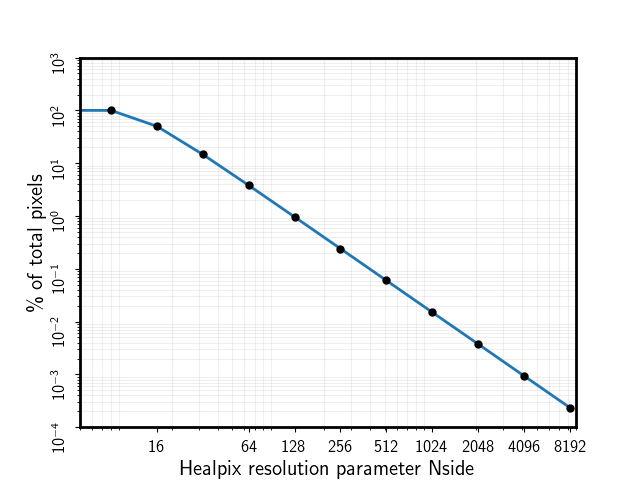

In [24]:
figure()
plot(list_nside,disc_pix*100./tot_pix,lw=2)
plot(list_nside,pix_frac*100.,"k.",label="",markersize=10)
#plot(list_nside,pix_frach*100.,"m.",label="",markersize=10)
ylim(1e-4,1000)
xlim(5,9000)
loglog()
#hlines(0.1,1,9000)
ylabel("\% of total pixels")
xlabel("Healpix resolution parameter Nside")
xticks([16,64,128,256,512,1024,2048,4096,8192],[16,64,128,256,512,1024,2048,4096,8192],fontsize="12")
yticks(fontsize=12,rotation=90)
grid(which=u"minor",ls="solid",alpha=0.2)
#savefig(figpath + "frac_of_disc_pixels.pdf",dpi=300,bbox_inches="tight")

In [59]:
figure()
plot(list_nside,odisc,"--",color="#ff7f0e",lw=2,label="Disc radius")
plot(list_nside,odisc,"k.",markersize=10)
ylabel(r"$r_{\rm cutoff} = \beta_o$  (degrees)",color="#ff7f0e")
semilogy()
grid(which=u"minor",ls="solid",alpha=0.2)
yticks([0.1,1,10,180],[0.1,1,10,180],fontsize=12)
ylim(0.1,200)
semilogx()
xlabel("\ell_{\rm max}")
lmax=[32,128,512,1024,4096,4096*3]
xticks([16,64,128,256,512,1024,2048,4096,8192],[48,64,128,256,512,1024,2048,4096,8192],fontsize=12)
twiny()
semilogx()
xticks([16,64,128,256,512,1024,2048,4096,8192],[3.*16,3.*64,3.*128,3.*256,3.*512,3.*1024,3*2048,3*4096,3*8192],fontsize=12)
xlabel("Healpix resolution parameter Nside")


twinx()
plot(list_nside,disc_pix,lw=2,label="No. of pixels")
plot(list_nside,disc_pix,"k.",label="",markersize=10,alpha=0.5)
#plot(list_nside,disc_pixh,"m.",label="",markersize=10,alpha=0.5)
yticks(fontsize=12)
ylabel("Total pixels in disc",color="#1f77b4")
#semilogx()
ylim(200,2000)
xlim(3,9000)




savefig(figpath + "number_of_disc_pixels.pdf",dpi=300,bbox_inches="tight")




<IPython.core.display.Javascript object>

RuntimeError: LaTeX was not able to process the following string:
'\\\\ell_{\\rm max}'
Here is the full report generated by LaTeX: 

This is pdfTeX, Version 3.1415926-2.3-1.40.12 (TeX Live 2011)
 restricted \write18 enabled.
entering extended mode
(./b0ba8c45040aa97d216e4c1de6a1798c.tex
LaTeX2e <2009/09/24>
Babel <v3.8l> and hyphenation patterns for english, dumylang, nohyphenation, ge
rman-x-2009-06-19, ngerman-x-2009-06-19, afrikaans, ancientgreek, ibycus, arabi
c, armenian, basque, bulgarian, catalan, pinyin, coptic, croatian, czech, danis
h, dutch, ukenglish, usenglishmax, esperanto, estonian, ethiopic, farsi, finnis
h, french, galician, german, ngerman, swissgerman, monogreek, greek, hungarian,
 icelandic, assamese, bengali, gujarati, hindi, kannada, malayalam, marathi, or
iya, panjabi, tamil, telugu, indonesian, interlingua, irish, italian, kurmanji,
 lao, latin, latvian, lithuanian, mongolian, mongolianlmc, bokmal, nynorsk, pol
ish, portuguese, romanian, russian, sanskrit, serbian, serbianc, slovak, sloven
ian, spanish, swedish, turkish, turkmen, ukrainian, uppersorbian, welsh, loaded
.
(/usr/local/texlive/2011/texmf-dist/tex/latex/base/article.cls
Document Class: article 2007/10/19 v1.4h Standard LaTeX document class
(/usr/local/texlive/2011/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2011/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2011/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2011/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/local/texlive/2011/texmf-dist/tex/latex/sfmath/sfmath.sty)
(/usr/local/texlive/2011/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2011/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2011/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2011/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2011/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file b0ba8c45040aa97d216e4c1de6a1798c.aux.
(/usr/local/texlive/2011/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.12 ...tsize{15.000000}{18.750000}{\sffamily \ell
                                                  _{
! Extra }, or forgotten $.
l.13 m max}}
            
! Missing $ inserted.
<inserted text> 
                $
l.14 \end{document}
                   
[1] (./b0ba8c45040aa97d216e4c1de6a1798c.aux) )
(\end occurred inside a group at level 1)

### simple group (level 1) entered at line 12 ({)
### bottom level
(see the transcript file for additional information)
Output written on b0ba8c45040aa97d216e4c1de6a1798c.dvi (1 page, 300 bytes).
Transcript written on b0ba8c45040aa97d216e4c1de6a1798c.log.


In [58]:
lmax=[32,128,512,1024,4096,4096*3]


In [200]:
nside=8192
y=rk.real_space_queb_kernels(nside,tmax=4.,maxlmax=3*nside,sampling=2000)
y.calc_qu2eb_rad_kernel(3*nside)
y.calc_qu2queb_rad_kernel(3*nside)

KeyboardInterrupt: 

In [ ]:
t8192=y.rad_ker
y.calc_qu2eb_rad_kernel(3*4096) ; t4096=y.rad_ker
y.calc_qu2eb_rad_kernel(3*2048) ; t2048=y.rad_ker
y.calc_qu2eb_rad_kernel(3*1024) ; t1024=y.rad_ker
y.calc_qu2eb_rad_kernel(3*512) ; t512=y.rad_ker

In [ ]:
plot(y.theta*180./pi,t8192/max(t8192)) ; vlines(odisc[10],1e-5,1)
plot(y.theta*180./pi,t4096/max(t4096)) ; vlines(odisc[9],1e-5,1)
plot(y.theta*180./pi,t2048/max(t2048)) ; vlines(odisc[8],1e-5,1)
plot(y.theta*180./pi,t1024/max(t1024)) ; vlines(odisc[7],1e-5,1)
plot(y.theta*180./pi,t512/max(t512)) ; vlines(odisc[6],1e-5,1)
semilogy()
hlines(1e-2,1e-5,4)
xlim(1e-3,10)
ylim(1e-3,2)
semilogx()

In [317]:
nest=False
v=h.pix2vec(4096,0,nest=nest)
spixel=h.query_disc(4096,v,0.44*np.pi/180.,inclusive=True,fact=4,nest=nest)

[]

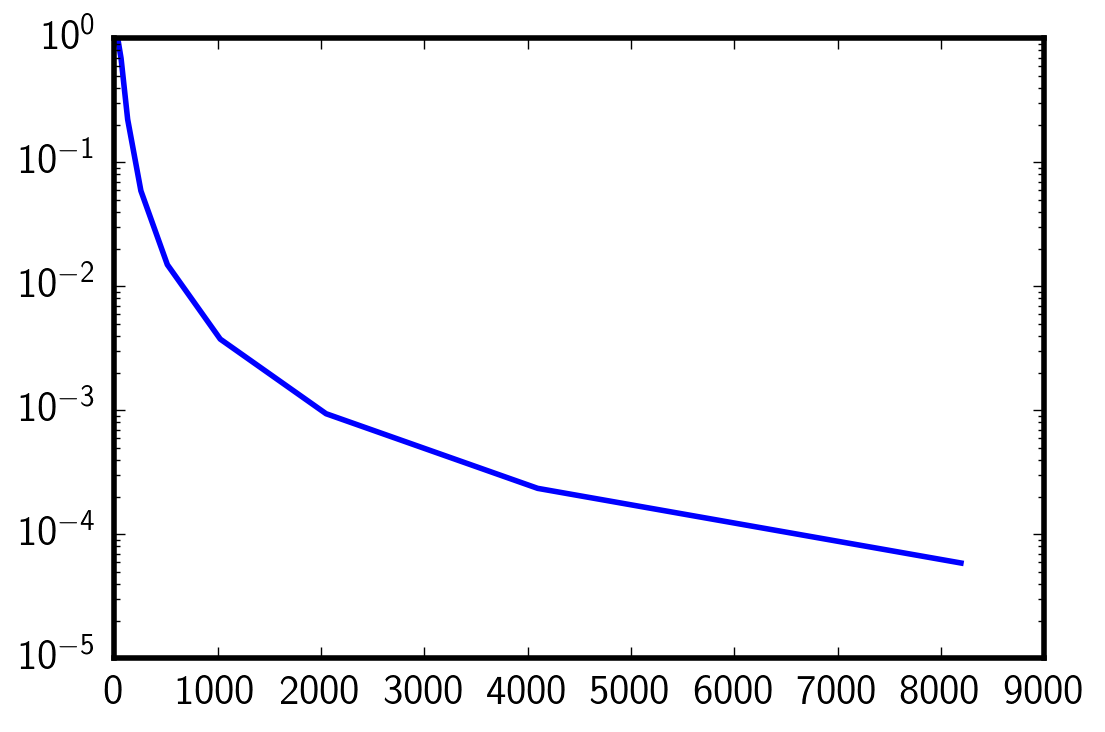

In [40]:
plot(list_nside,disc_pixh/tot_pix)
semilogy()

In [41]:
m=h.read_map("../../figures/simulated/high_res_qu2eb/lensingb/generated_data/mask.fits")

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [46]:
180*360/900

72